In [1]:
from ECG_helpers import *


In [2]:
#number of ids to plot
N_ids_to_plot=10

In [3]:
fold = 'train'
demo= pd.read_csv(path_store + 'demo_' + fold + '.csv', header=0, index_col=0)
Xs = np.load(path_store + 'X_' + fold + '.npy')


In [9]:
def plot_ECG(X, eid, resize_factor, age, sex):
    x=resize_timesteps(resize_factor)  
    plt.figure()
    for lead in range(X.shape[1]):
        plt.plot(x, X[:,lead])
    plt.legend([str(e) for e in range(1,X.shape[1]+1)])
    plt.title('ECG, Age=' + age + ', Sex=' + sex + ', resize_factor=' + str(resize_factor) + ', ID=' + eid)
    plt.xlabel('time (s)')
    plt.ylabel('Voltage (mV)')
    #save figure as pdf
    plt.savefig('../figures/ECGs/ECG_' + eid + '_' + str(X.shape[0]).zfill(3)  +'.pdf', bbox_inches='tight')

/home/al311/python_3.6.0/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


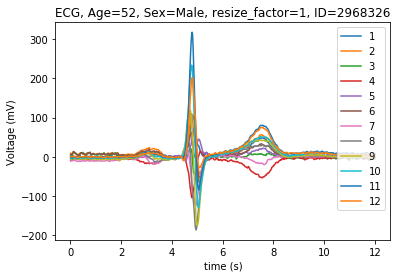

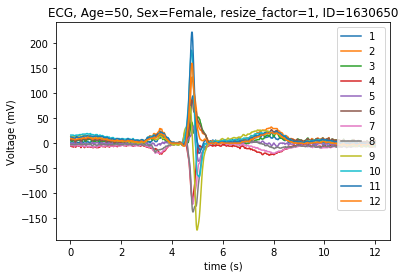

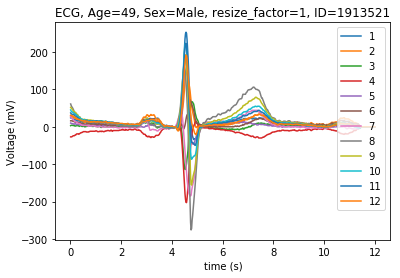

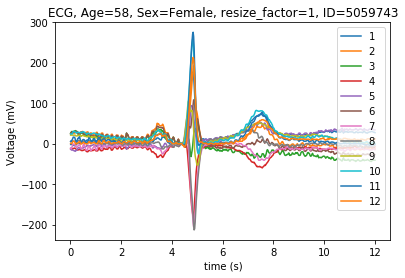

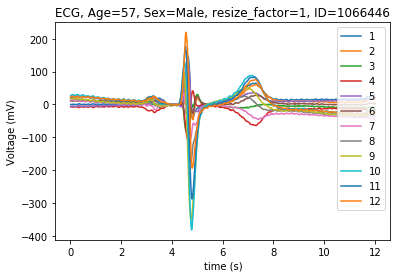

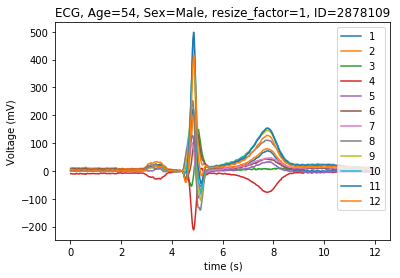

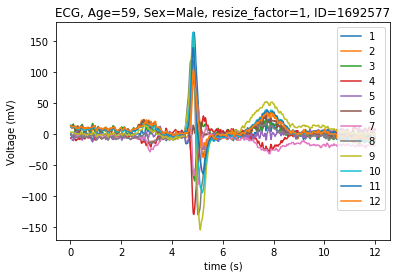

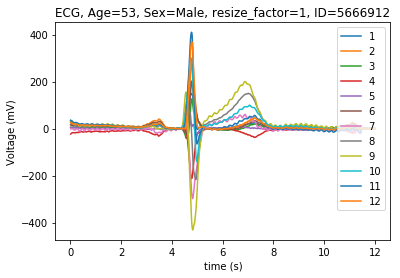

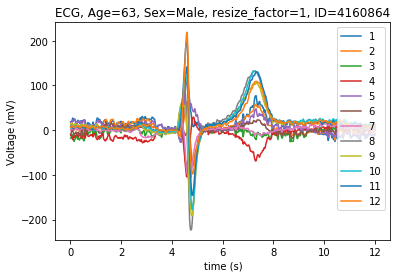

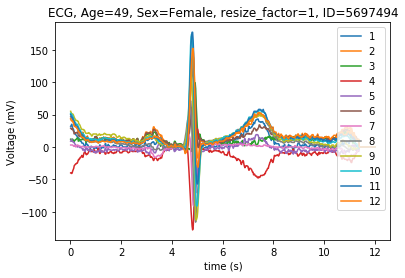

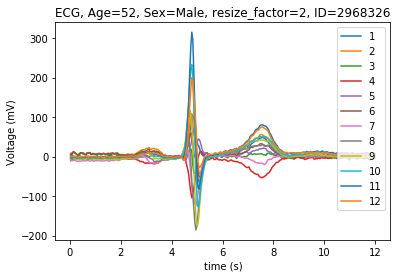

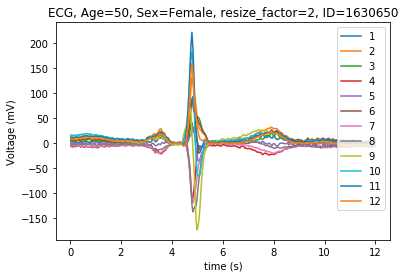

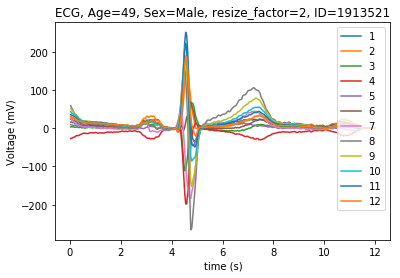

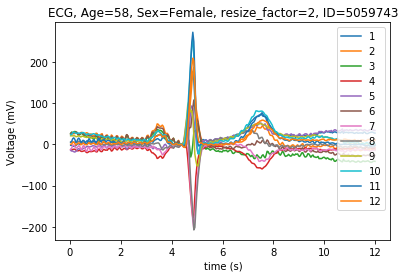

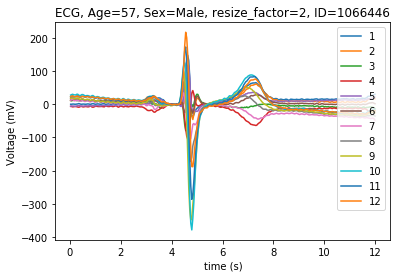

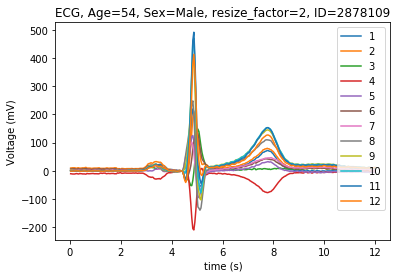

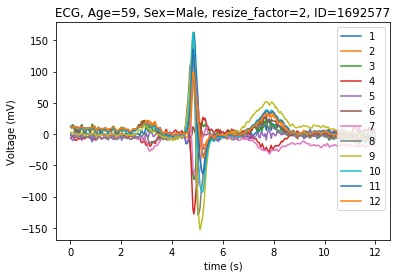

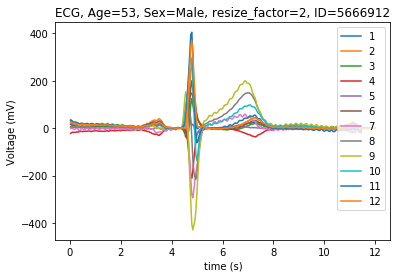

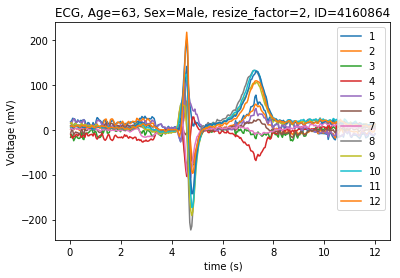

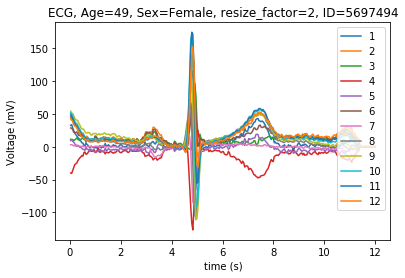

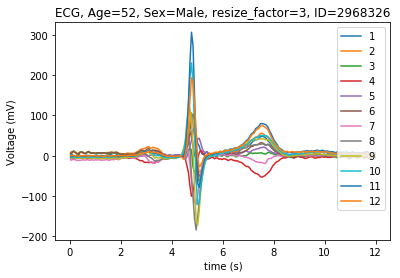

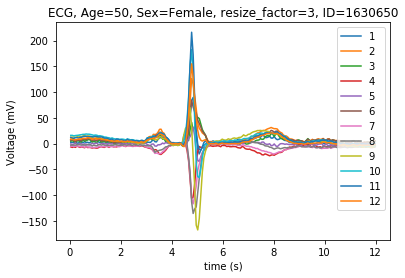

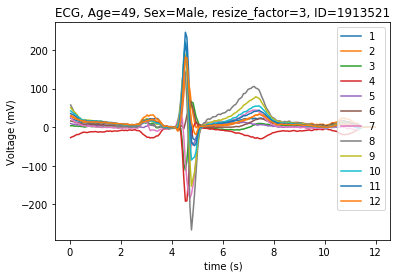

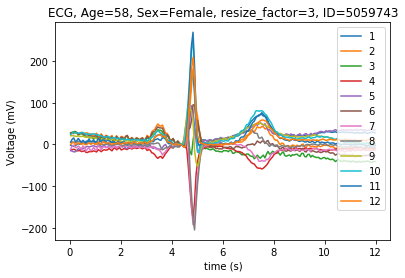

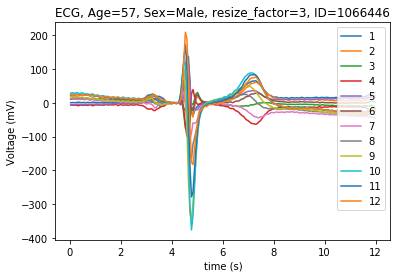

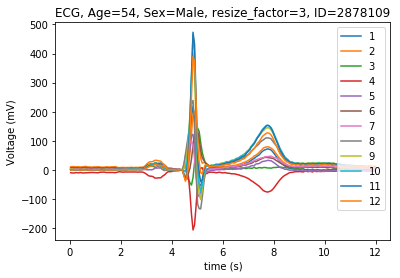

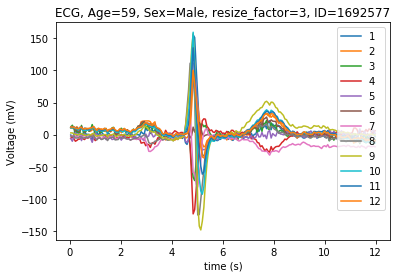

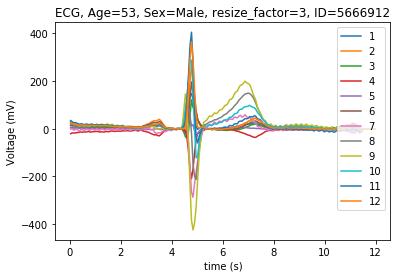

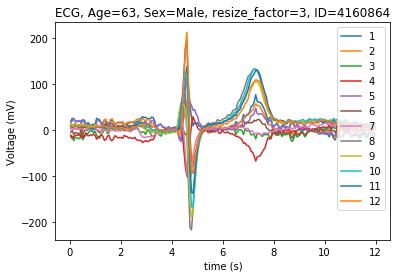

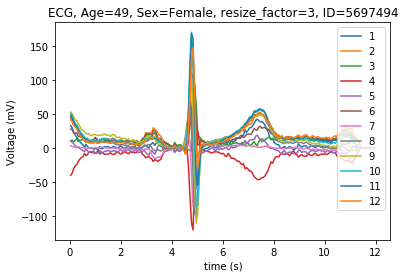

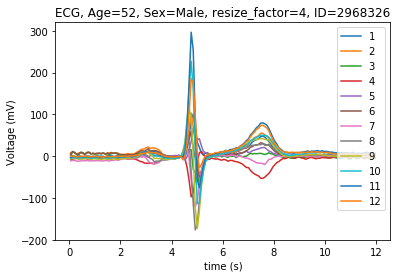

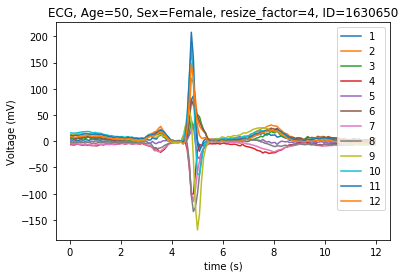

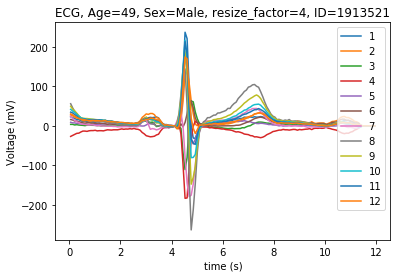

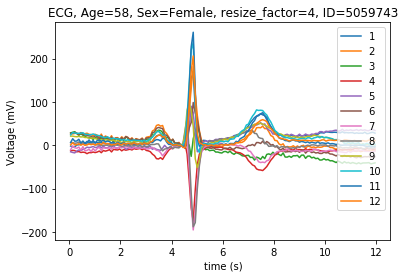

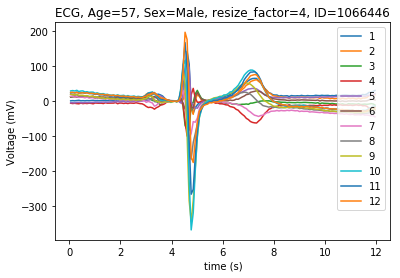

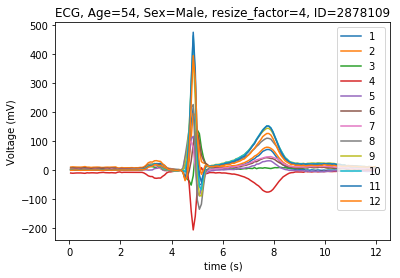

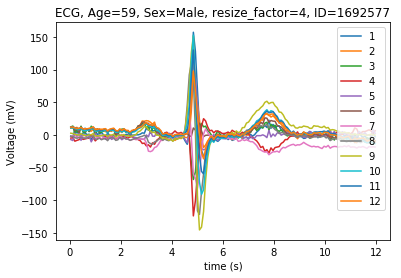

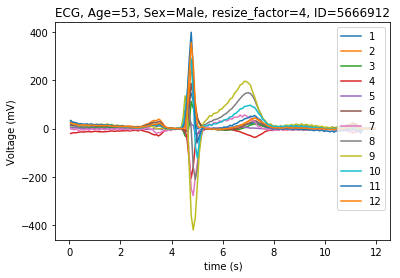

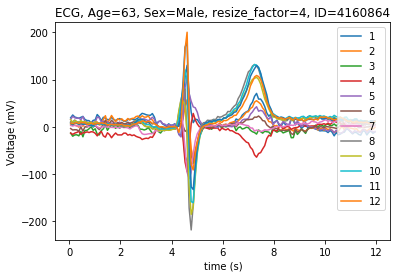

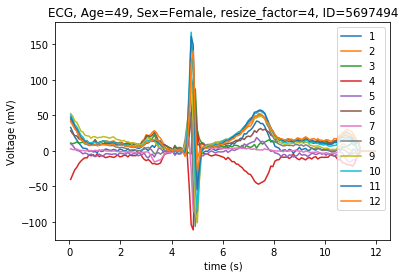

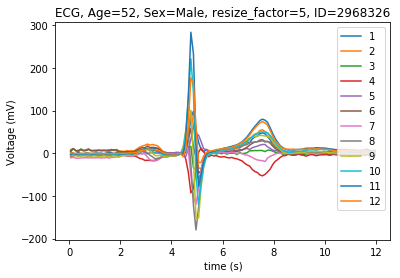

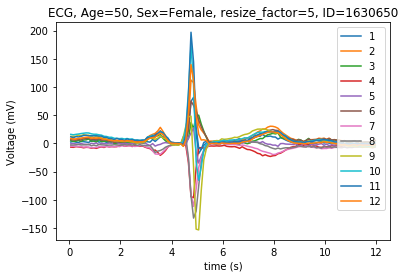

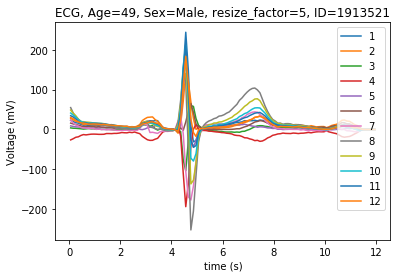

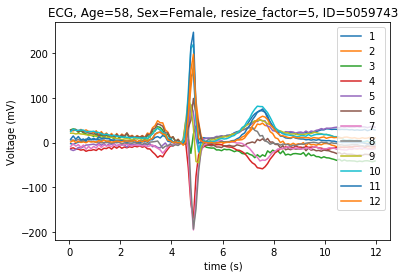

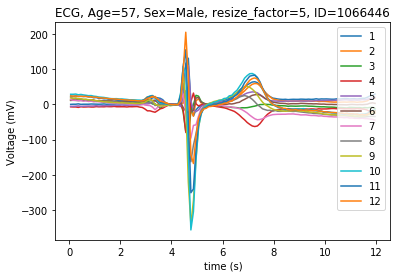

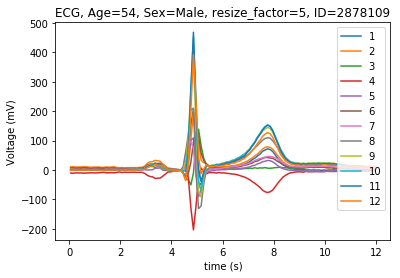

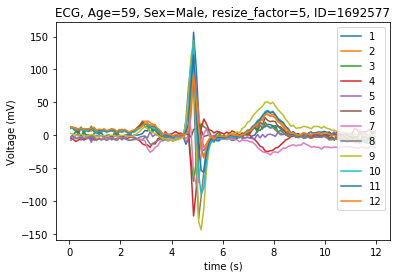

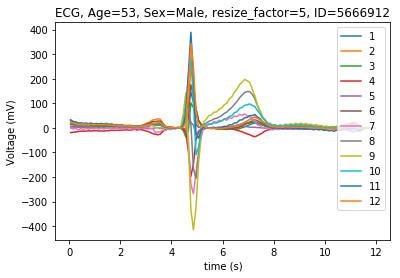

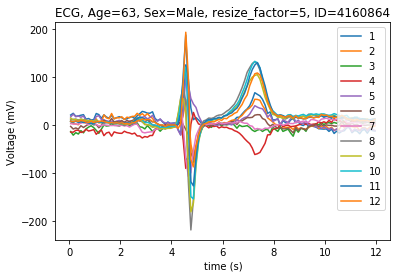

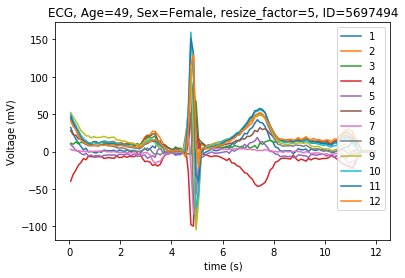

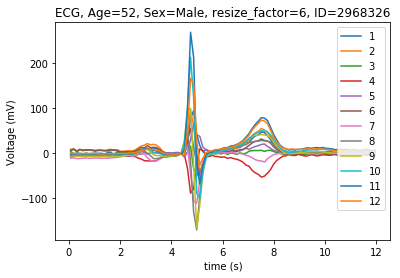

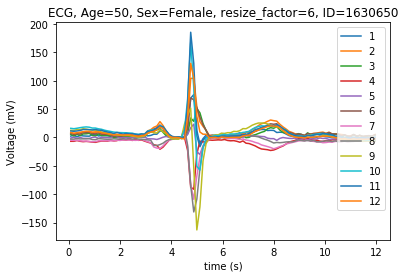

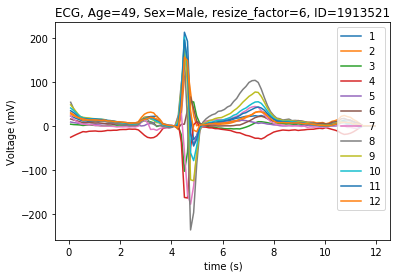

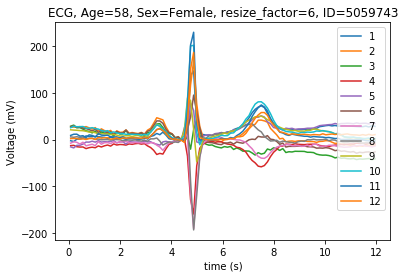

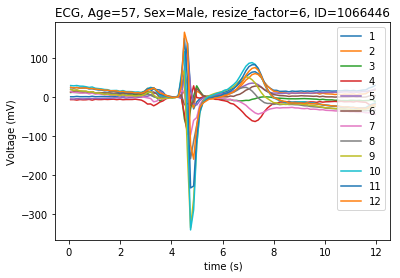

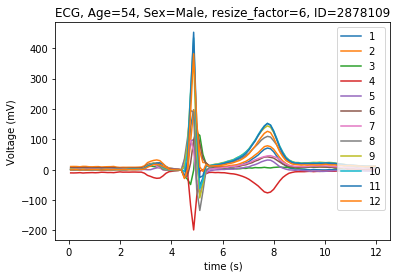

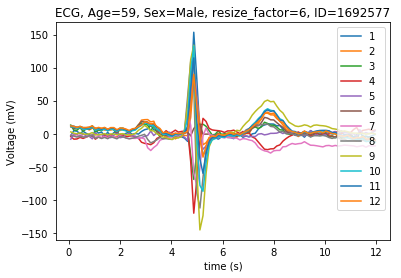

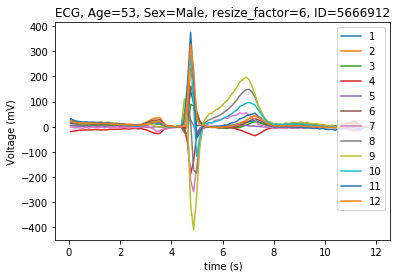

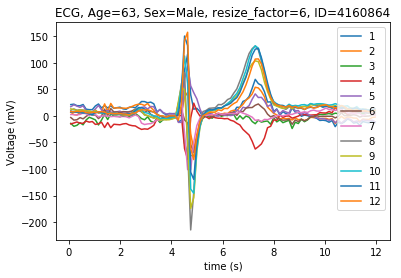

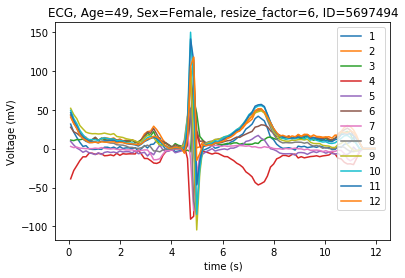

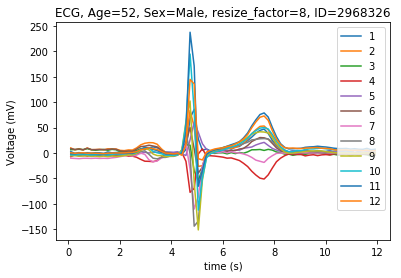

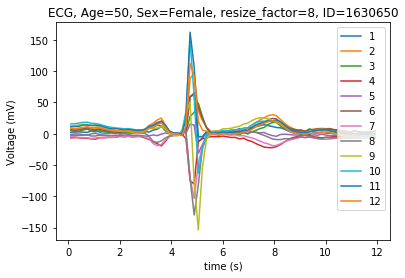

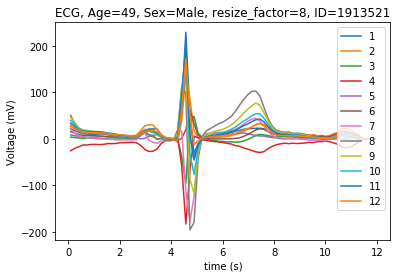

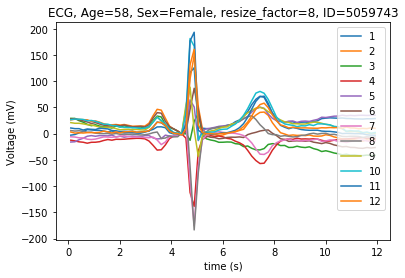

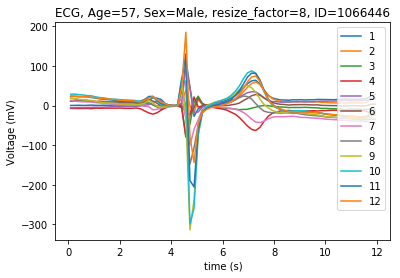

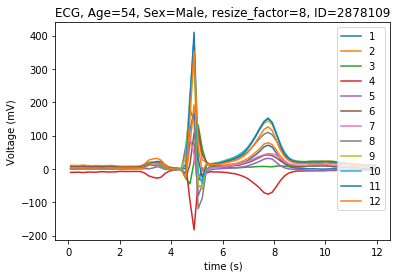

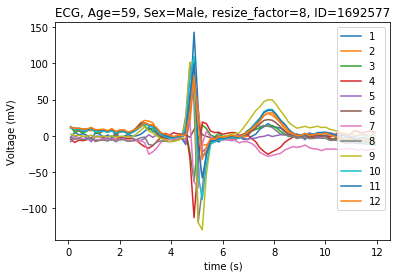

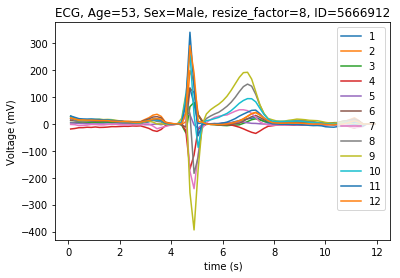

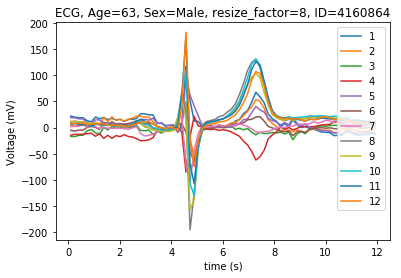

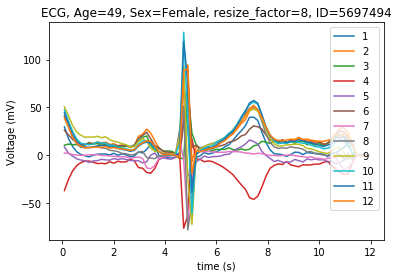

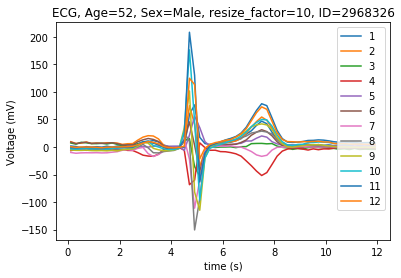

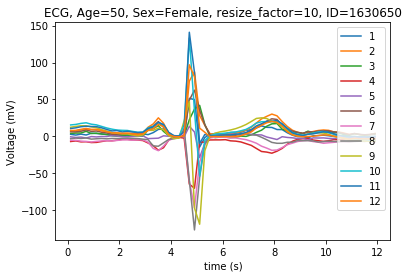

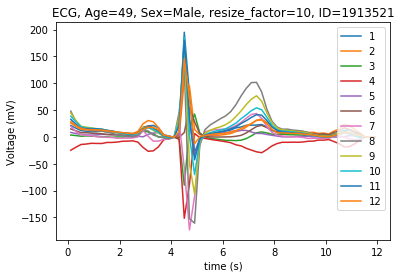

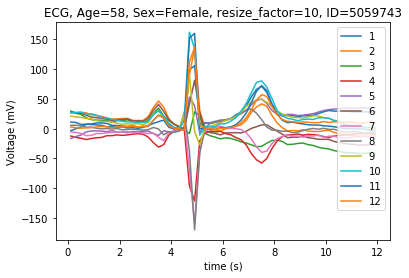

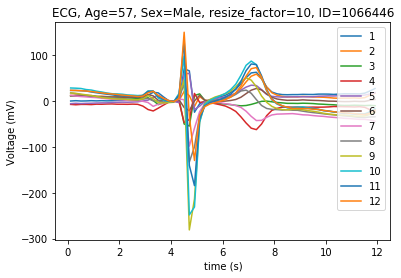

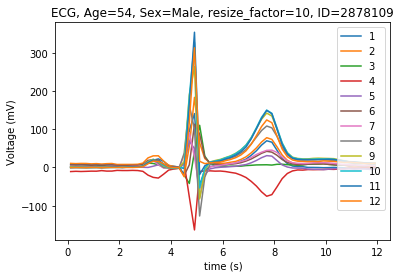

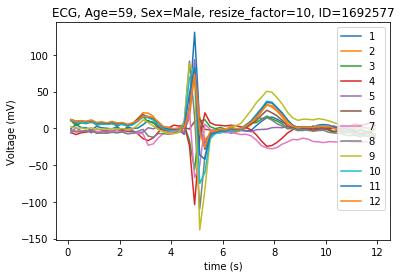

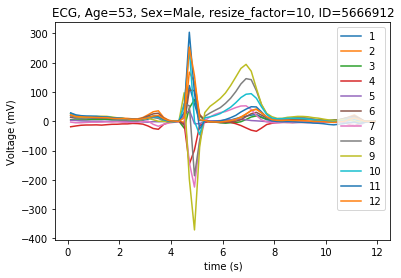

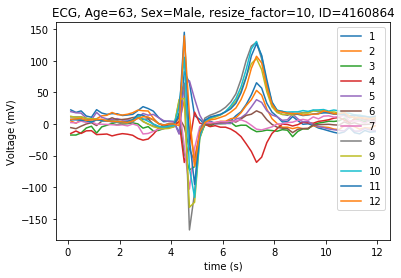

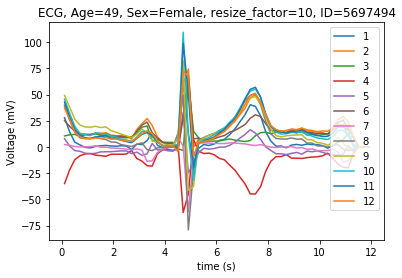

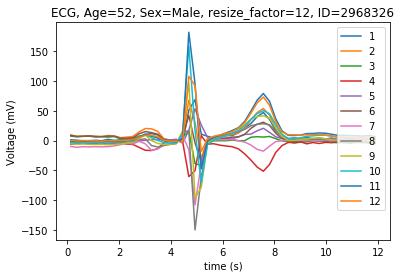

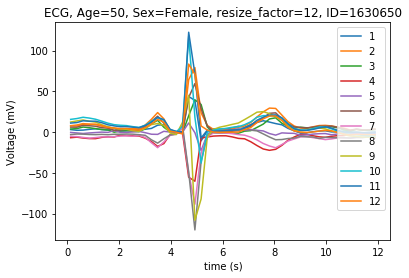

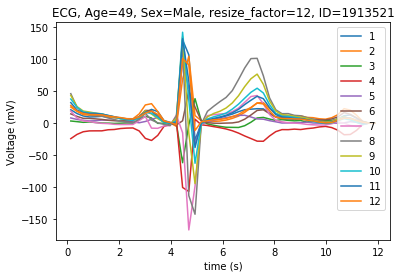

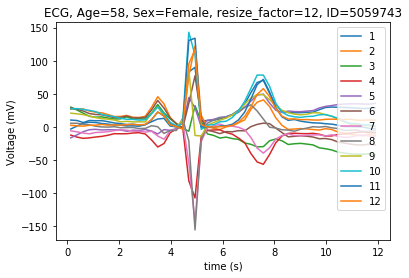

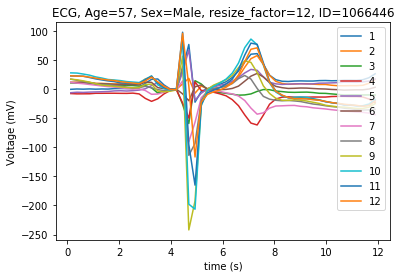

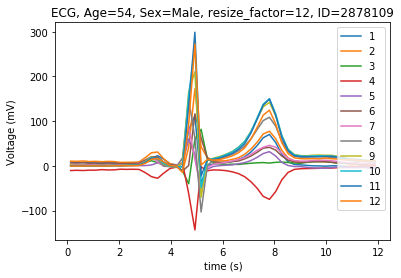

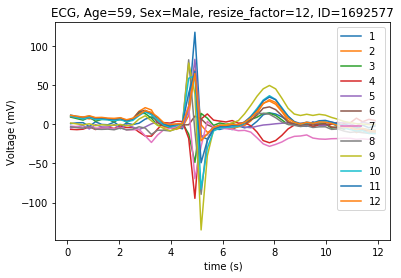

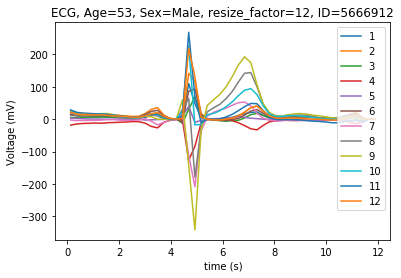

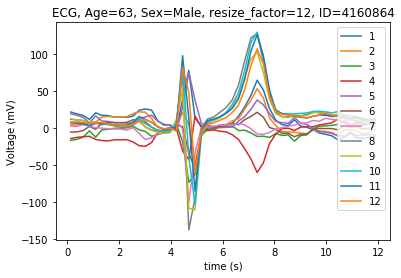

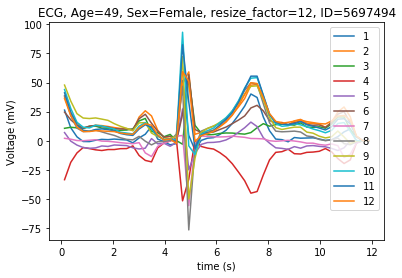

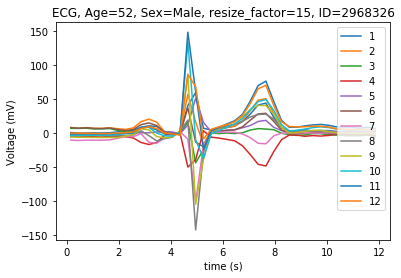

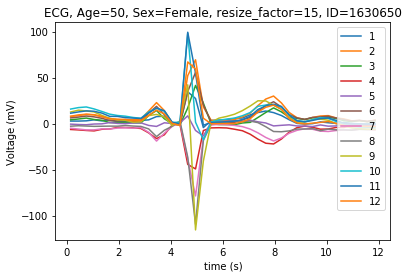

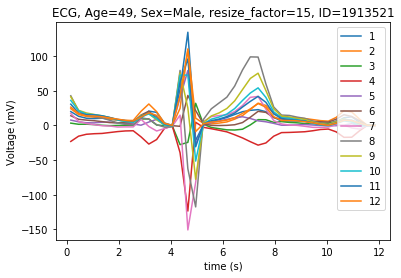

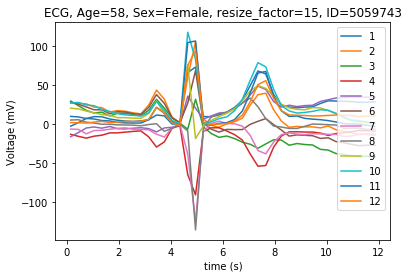

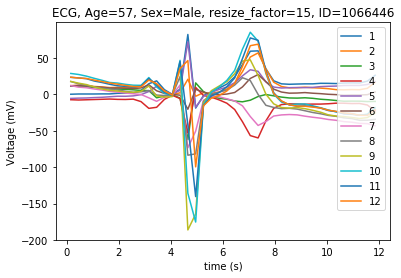

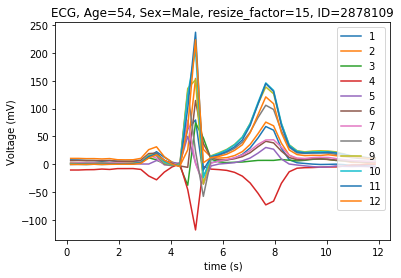

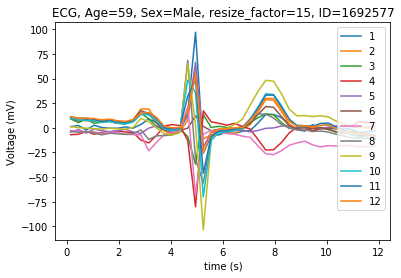

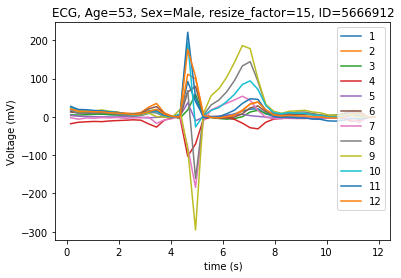

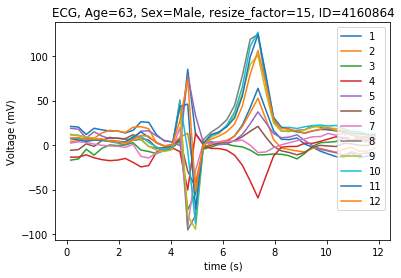

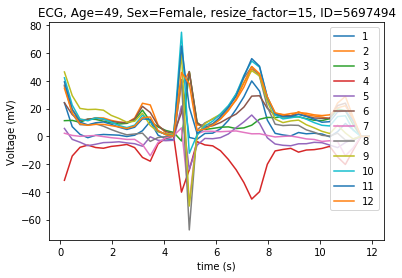

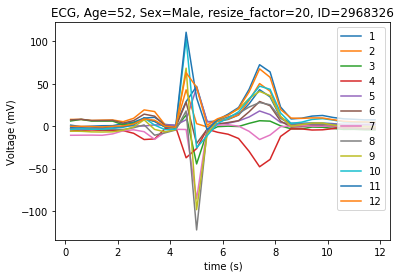

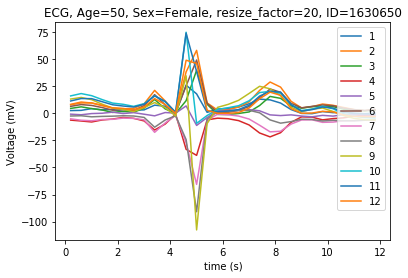

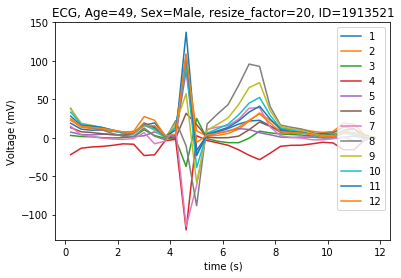

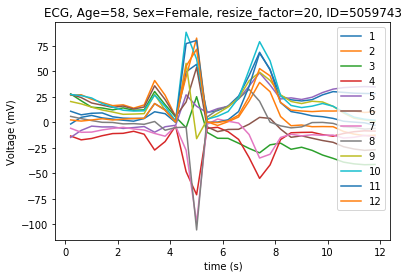

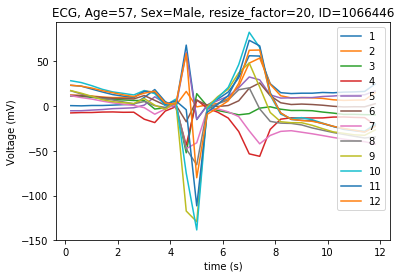

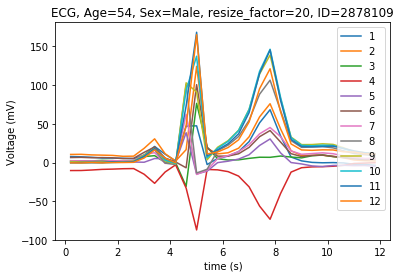

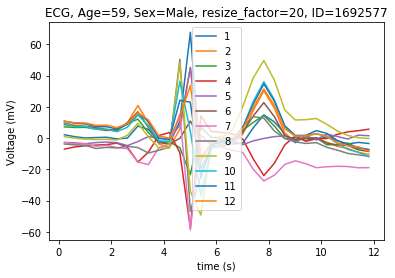

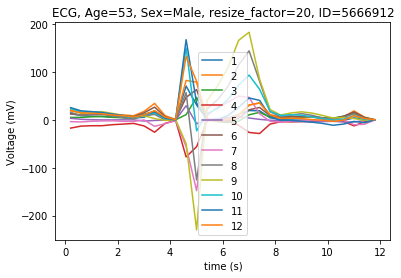

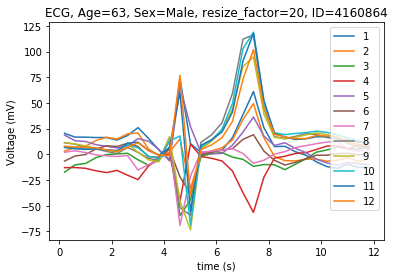

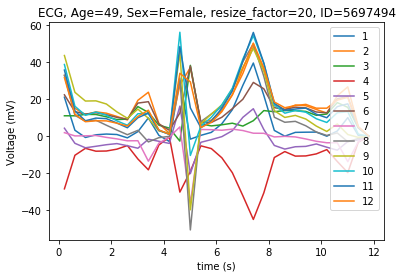

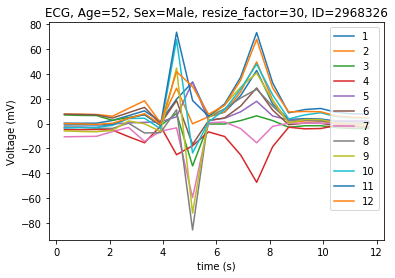

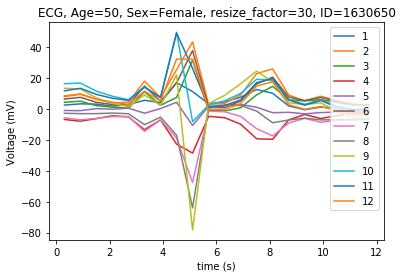

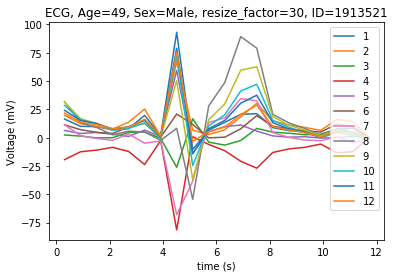

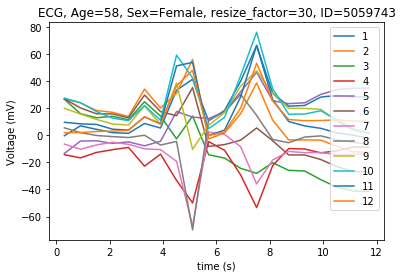

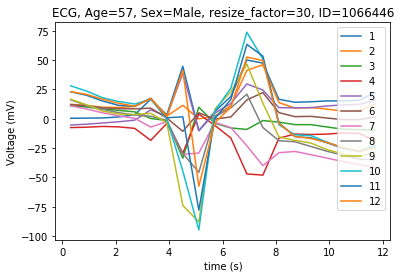

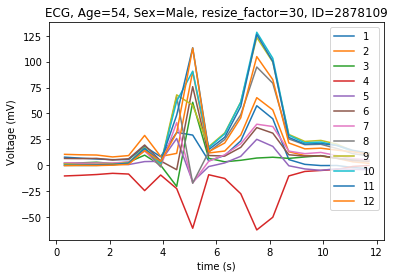

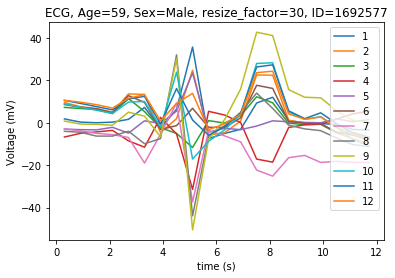

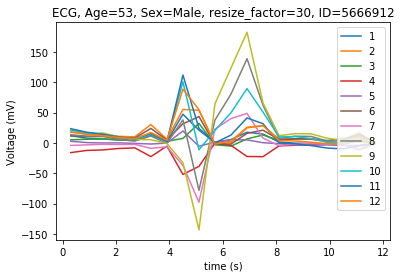

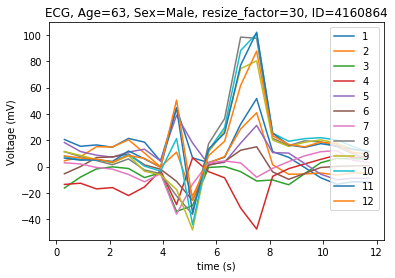

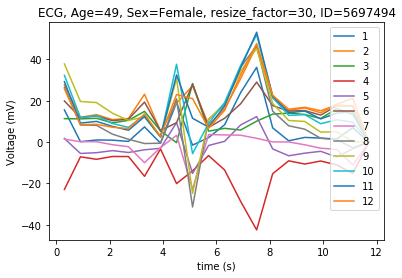

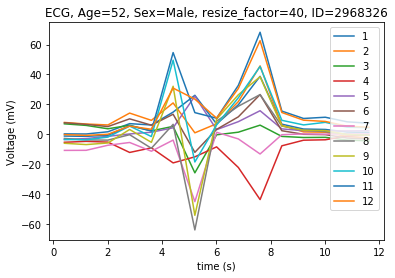

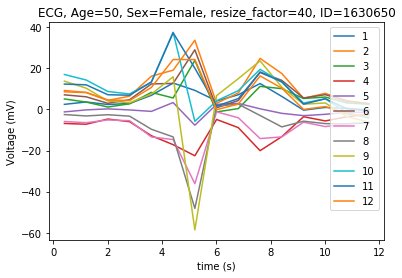

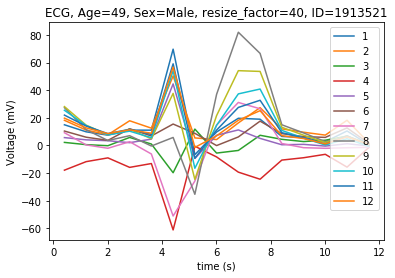

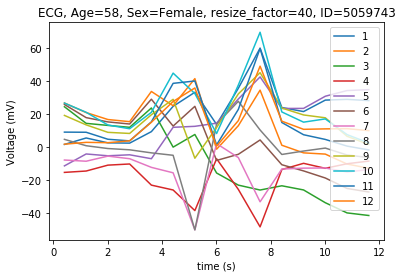

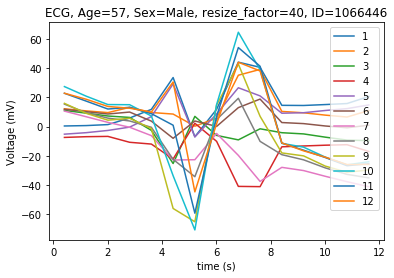

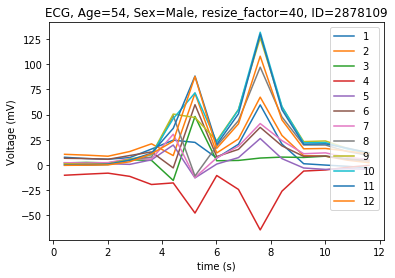

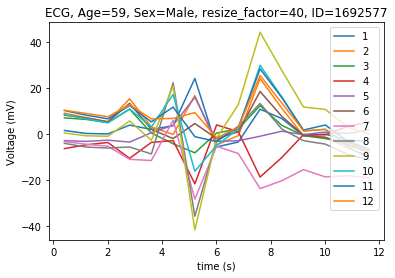

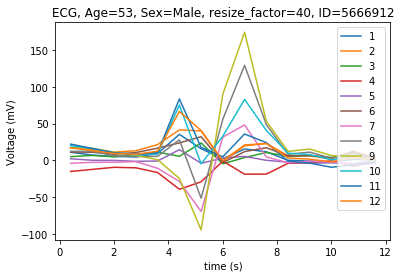

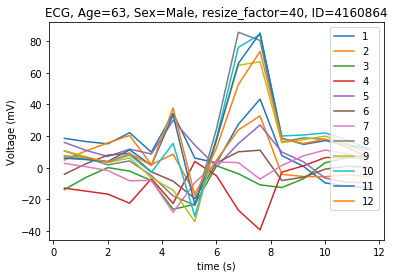

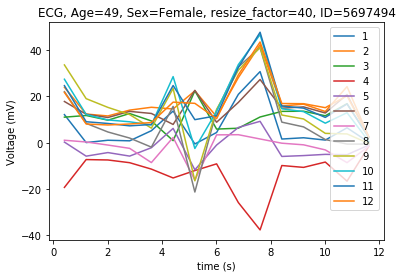

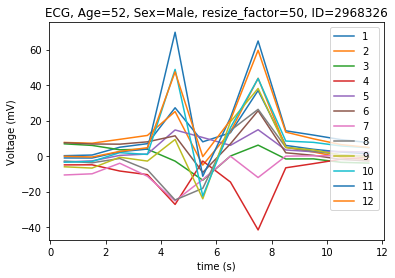

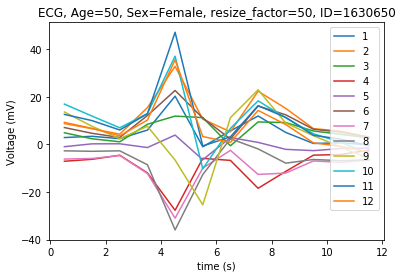

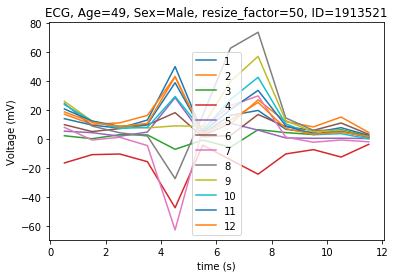

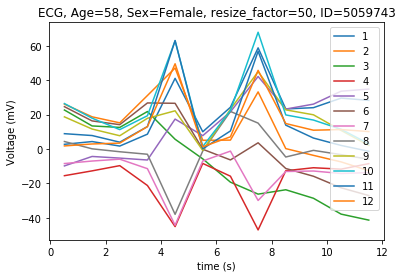

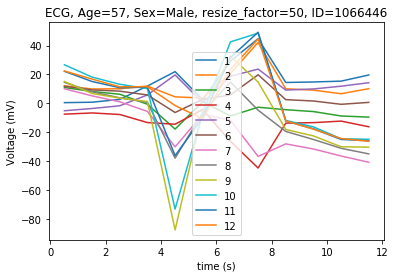

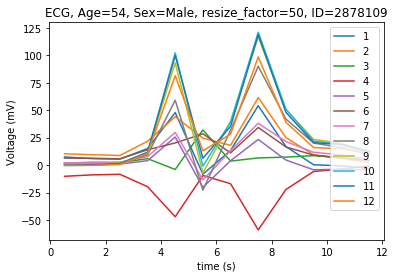

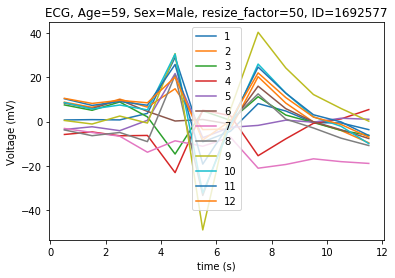

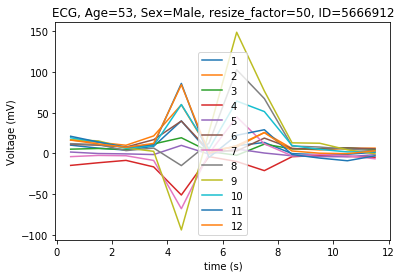

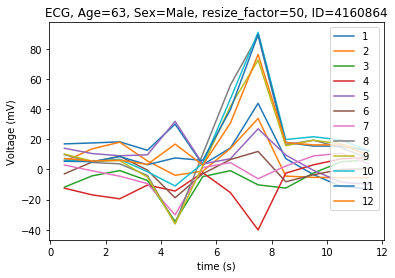

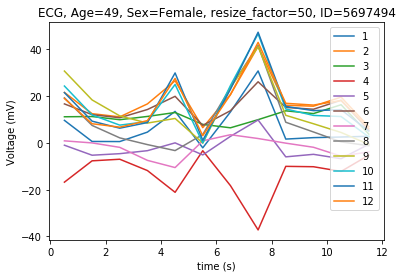

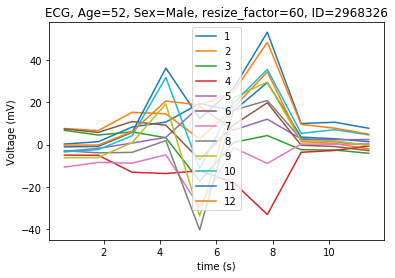

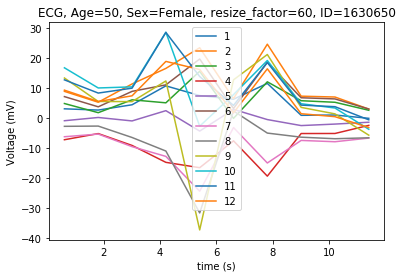

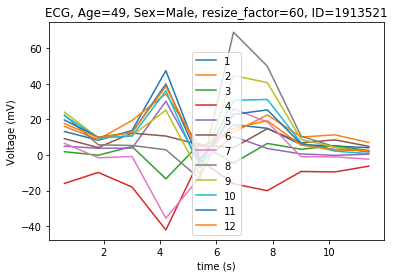

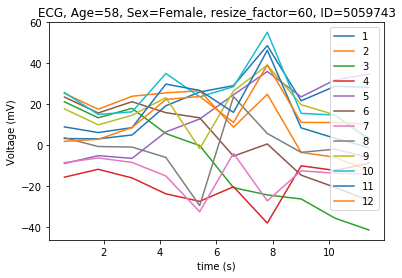

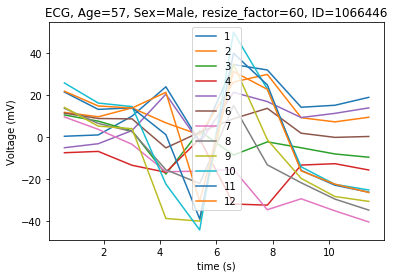

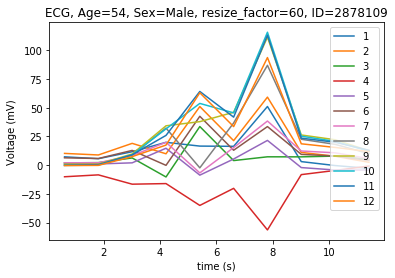

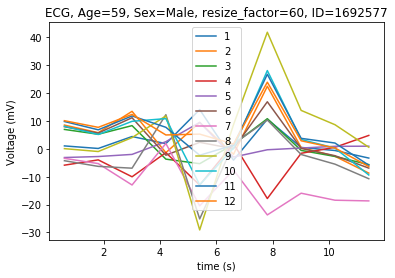

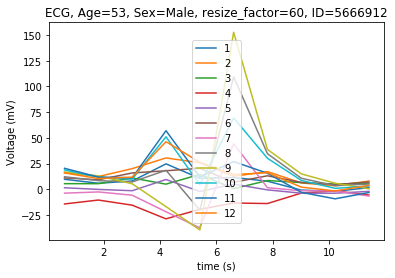

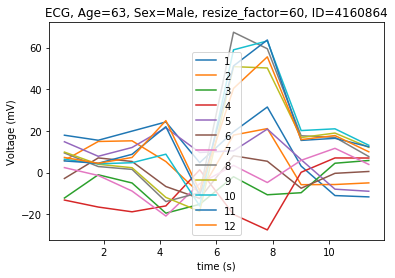

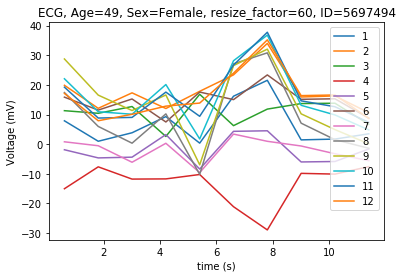

In [10]:
for resize_factor in [1,2,3,4,5,6,8,10,12,15,20,30,40,50,60]:
    Xs_resized = resize_X_by_timesteps(Xs,resize_factor)
    for i, eid in enumerate(demo.index.values[:N_ids_to_plot]):
        age = str(int(demo.loc[eid,'Age']))
        sex = 'Female' if demo.loc[eid,'Sex'] ==1 else 'Male'
        X = Xs_resized[i,:,:]
        plot_ECG(X, str(eid), resize_factor, age, sex)


